In [3]:
# 2021-11-09 park_poi analitycs
# 

In [3]:
#+++ версия 2020.09.21 инициализация посредством global init()
from importlib import reload
import adds
adds = reload(adds)
from adds import * # import adds functions

init()

ii(dfr,1)
# read_rmsp()

0:00:00.002 ₀╷₀₀╷₀₀.₀₀₂ init()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,HTML,Path,Struct,__builtins__,__cached__,__doc__,__file__,__loader__,__name__,__package__,__spec__,_log,_o,adds,datetime,df_info
1,dfr,disp,display,draw_l,glob,gmtime,grpp,ii,init,isfile,join,l,listdir,math,merge_OKVED,np
2,os,pd,plt,read_rmsp,reload,requests,shutil,sizeof_fmt,start,strftime,time,tm,tmpxls,xl_rowcol_to_cell,xlspcl,zipfile


,name,rows,cols,memory,keys


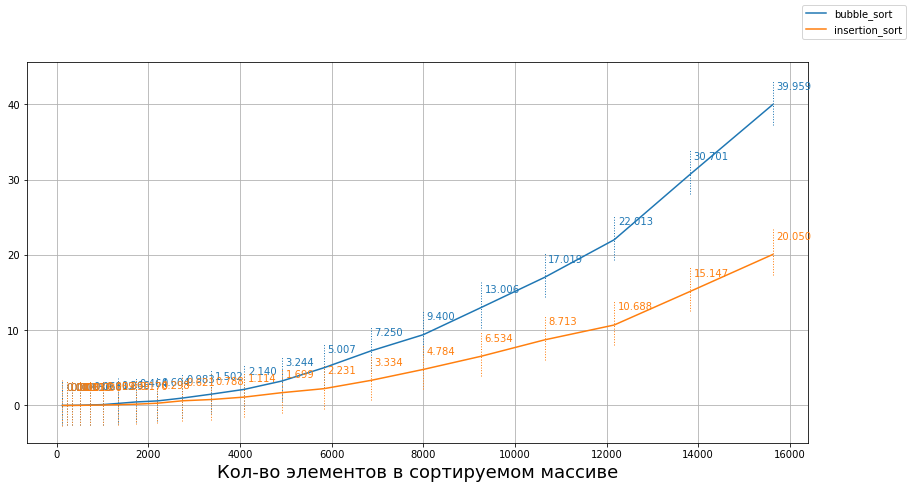

In [26]:
def insertion_sort(array):
    # Loop from the second element of the array until
    # the last element
    for i in range(1, len(array)):
        # This is the element we want to position in its
        # correct place
        key_item = array[i]

        # Initialize the variable that will be used to
        # find the correct position of the element referenced
        # by `key_item`
        j = i - 1

        # Run through the list of items (the left
        # portion of the array) and find the correct position
        # of the element referenced by `key_item`. Do this only
        # if `key_item` is smaller than its adjacent values.
        while j >= 0 and array[j] > key_item:
            # Shift the value one position to the left
            # and reposition j to point to the next element
            # (from right to left)
            array[j + 1] = array[j]
            j -= 1

        # When you finish shifting the elements, you can position
        # `key_item` in its correct location
        array[j + 1] = key_item

    return array

def bubble_sort(array):
    n = len(array)

    for i in range(n):
        # Create a flag that will allow the function to
        # terminate early if there's nothing left to sort
        already_sorted = True

        # Start looking at each item of the list one by one,
        # comparing it with its adjacent value. With each
        # iteration, the portion of the array that you look at
        # shrinks because the remaining items have already been
        # sorted.
        for j in range(n - i - 1):
            if array[j] > array[j + 1]:
                # If the item you're looking at is greater than its
                # adjacent value, then swap them
                array[j], array[j + 1] = array[j + 1], array[j]

                # Since you had to swap two elements,
                # set the `already_sorted` flag to `False` so the
                # algorithm doesn't finish prematurely
                already_sorted = False

        # If there were no swaps during the last iteration,
        # the array is already sorted, and you can terminate
        if already_sorted:
            break

    return array

def draw_plot (df):
    plt.rcParams["figure.figsize"] = (14,7)
    fig,ax = plt.subplots()


    sort_keys = df.iloc[:,1:].keys()

    ax.grid()

    xcoords = df['chunk']

    max_y = df[sort_keys].max().max()
    max_x = df['chunk'].max()


    #     plt.show()    
    for k in sort_keys:
        line, = ax.plot(df['chunk'],df[k] )
        c = line.get_color()

        for i,xc in enumerate(xcoords):
    #         print (k,xc,)
            y = list(df[k])[i]
            ax.text(xc+max_x/200,y+max_y/20,"%0.3f"%y, color=c)
            ax.vlines(xc, lw=1, ls=':', ymin=y-max_y/15, ymax=y+max_y/12, color=c)
    fig.legend(sort_keys);

    plt.xlabel('Кол-во элементов в сортируемом массиве', fontsize=18)

#     for i,xc in enumerate(xcoords):
#         y = list(df[k])[i]
#         ax.axvline(xc, lw=1, ls=':', ymin=0, ymax=y*1.1)
    plt.show()
    
draw_plot(df)         

*** Start at: 18:39:54 ₂₀₂₂₋₀₅₋₀₇  ************************************************************
35


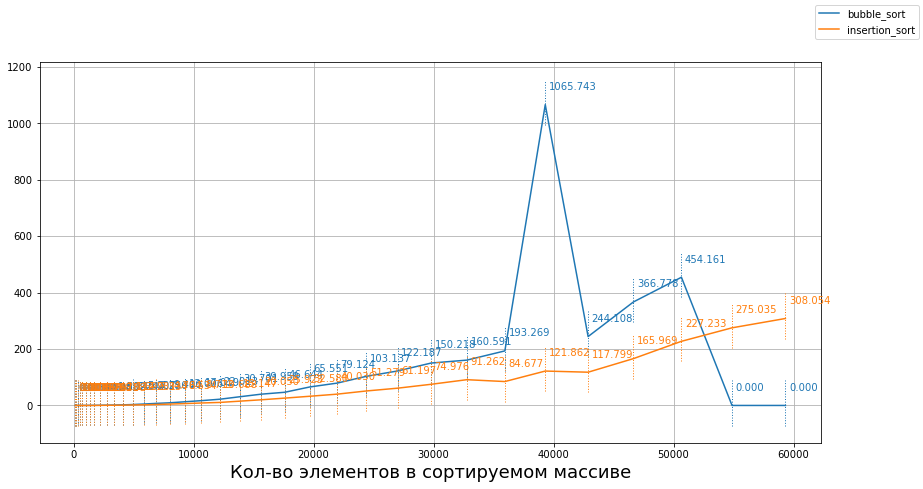

In [27]:
from random import random
from IPython.display import clear_output

tm()

tlap = []

st = 5
en = 40

df = pd.read_pickle('sorting_compare_%s_%s.pcl'%(st,en))
print(df.shape[0])
draw_plot(df)


In [18]:
osmpath = r'C:\!HML\03.Services\05.BMO\03.Geozones\russia\\'

In [31]:
# https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/
tm()
os.chdir(osmpath)
osm_poi_files = [i for i in glob.glob('*osm.csv')]

dfr['poi']  = pd.DataFrame()

for f in osm_poi_files:
    tm(f)
    dfr['poi'] = pd.concat([dfr['poi'], pd.read_csv(osmpath+f, sep='|', low_memory=False)])

tm(osm_poi_files, dfr['poi'].shape)

*** Start at: 19:32:10 ₂₀₂₁₋₁₁₋₁₂  ************************************************************
[  0.27   ₀.₃]19:32:11 ₂₀₂₁₋₁₁₋₁₂  central-fed-district-pois.osm.csv
[  3.46   ₃.₇]19:32:14 ₂₀₂₁₋₁₁₋₁₂  crimean-fed-district-pois.osm.csv
[  0.32   ₄.₁]19:32:14 ₂₀₂₁₋₁₁₋₁₂  far-eastern-fed-district-pois.osm.csv
[  0.58   ₄.₆]19:32:15 ₂₀₂₁₋₁₁₋₁₂  kaliningrad-pois.osm.csv
[  0.18   ₄.₈]19:32:15 ₂₀₂₁₋₁₁₋₁₂  north-caucasus-fed-district-pois.osm.csv
[  0.42   ₅.₂]19:32:16 ₂₀₂₁₋₁₁₋₁₂  northwestern-fed-district-pois.osm.csv
[  1.79   ₇.₀]19:32:17 ₂₀₂₁₋₁₁₋₁₂  siberian-fed-district-pois.osm.csv
[  1.28   ₈.₃]19:32:19 ₂₀₂₁₋₁₁₋₁₂  south-fed-district-pois.osm.csv
[  1.11   ₉.₄]19:32:20 ₂₀₂₁₋₁₁₋₁₂  ural-fed-district-pois.osm.csv
[  1.18  ₁₀.₆]19:32:21 ₂₀₂₁₋₁₁₋₁₂  volga-fed-district-pois.osm.csv
[  2.53  ₁₃.₁]19:32:24 ₂₀₂₁₋₁₁₋₁₂  ['central-fed-district-pois.osm.csv', 'crimean-fed-district-pois.osm.csv', 'far-eastern-fed-district-pois.osm.csv', 'kaliningrad-pois.osm.csv', 'north-caucasus-fed-district-pois.

In [5]:
# 2021-11-10 read poi

# fname = r'parking_100k.csv'
fname = r'parking_30.csv'
colnames=['ID', 'lat', 'lon'] 
tm()

dfr['park'] = pd.read_csv(osmpath+fname, sep=',', low_memory=False, names=colnames, header=None)
tm(dfr['park'].count())

*** Start at: 17:01:53 ₂₀₂₁₋₁₁₋₁₂  ************************************************************
[  0.11   ₀.₁]17:01:53 ₂₀₂₁₋₁₁₋₁₂  ID     193543
lat    193543
lon    193543
dtype: int64


In [35]:
#  
tm()

_len = 190000

# fname = r'C:\_dev\gpx_reg\data\parking_'+str(_len)+'.csv'
fname = r'C:\_dev\gpx_reg\app\geodata\parking_data.csv'
# dfr['node_res_park_poi_osm'][:_len].to_csv(fname,sep='|')
dfr['node_res_park_poi_osm'][:_len].to_csv(fname,sep='|')

tm('>>>')

*** Start at: 19:35:36 ₂₀₂₁₋₁₁₋₁₂  ************************************************************
[  1.88   ₁.₉]19:35:38 ₂₀₂₁₋₁₁₋₁₂  >>>


In [7]:
# 2021-11-09 read poi

# fname = r'parking_100k.csv'
fname = r'node_res_park_poi_osm.csv'
# colnames=['ID', 'lat', 'lon'] 
tm()

dfr['node_res_park_poi_osm'] = pd.read_csv(osmpath+fname, sep=',', low_memory=False)
tm(dfr['node_res_park_poi_osm'].count())

*** Start at: 17:03:02 ₂₀₂₁₋₁₁₋₁₂  ************************************************************
[  5.82   ₅.₈]17:03:08 ₂₀₂₁₋₁₁₋₁₂  device_id            1959097
vin                  1959097
model                1959097
lat                  1959097
lng                  1959097
arrive_time          1959097
departure_time       1959097
duration_in_place    1959097
poi_lat              1587892
poi_lng              1587892
name                 1587892
poi_type             1587892
distance_to_poi      1587892
dtype: int64


In [45]:
df = dfr['node_res_park_poi_osm']
df.groupby(['poi_type'])['vin'].count().reset_index().sort_values(['vin'],ascending = False)

,poi_type,vin
37,cafe,206003
141,pharmacy,145529
85,fast_food,136227
15,bank,133978
113,kindergarten,113746
...,...,...
73,doctors;clinic;hospital,1
180,smoking_area,1
2,animal_breeding,1
135,parking;vehicle_inspection;bus_station,1


In [40]:
ii(dfr,1)

,name,rows,cols,memory,keys
0,'poi',1166350,26,"251,931,600","['ID', 'NAME', 'CATEGORY', 'SUBCATEGORY', 'LON', 'LAT', 'SRID', 'WKT', 'INTERNATIONAL_NAME', 'STREET', 'WIKIPEDIA', 'PHONE', 'CITY', 'EMAIL', 'ALTERNATIVE_NAME', 'OPENING_HOURS', 'DESCRIPTION', 'WEBSITE', 'LAST_UPDATE', 'OPERATOR', 'POSTCODE', 'COUNTRY', 'FAX', 'IMAGE', 'HOUSENUMBER', 'OTHER_TAGS']"
1,'park_poi',1244449,7,"79,644,736","['ID', 'LAT', 'LON', 'OTHER_TAGS', '_lat', '_lon', 'PARK_ID']"
2,'park',193543,3,"4,645,160","['ID', 'lat', 'lon']"
3,'node_res_park_poi_osm',1959097,13,"203,746,216","['device_id', 'vin', 'model', 'lat', 'lng', 'arrive_time', 'departure_time', 'duration_in_place', 'poi_lat', 'poi_lng', 'name', 'poi_type', 'distance_to_poi']"


In [30]:
tm()

df = dfr['poi']

dfr['park_poi'] = pd.DataFrame()

for i,r in dfr['park'].iterrows(): #.sample(2000)
    _lat = r['lat']
    _lon = r['lon']
    _id = r['ID']
    
    df_park_poi = df.loc[( np.absolute(df['LAT'] - _lat)  < 0.002 ) & (np.absolute(df['LON'] - _lon) < 0.001)  ][['ID','LAT','LON','OTHER_TAGS']]
    df_park_poi[['_lat','_lon','PARK_ID']] = [_lat,_lon,_id ]
    
    dfr['park_poi'] = pd.concat([dfr['park_poi'],df_park_poi])
    
    
#     print (_lat, _lon, "\n", dfr['select'].shape,"\n\n")
#     display(HTML( dfr['select'].to_html()))
    
    
    if (i%5000 == 0): tm([i, ": " ,dfr['park_poi'].shape])
        
tm([dfr['park_poi'].shape, i])

*** Start at: 18:50:09 ₂₀₂₁₋₁₁₋₀₉  ************************************************************
[  0.05   ₀.₁]18:50:09 ₂₀₂₁₋₁₁₋₀₉  [0, ': ', (1, 7)]
[239.51 ₂₃₉.₆]18:54:08 ₂₀₂₁₋₁₁₋₀₉  [5000, ': ', (37018, 7)]
[325.26 ₅₆₄.₈]18:59:33 ₂₀₂₁₋₁₁₋₀₉  [10000, ': ', (72756, 7)]
[450.65₁₀₁₅.₅]19:07:04 ₂₀₂₁₋₁₁₋₀₉  [15000, ': ', (102622, 7)]
[480.07₁₄₉₅.₅]19:15:04 ₂₀₂₁₋₁₁₋₀₉  [20000, ': ', (123814, 7)]
[539.83₂₀₃₅.₄]19:24:04 ₂₀₂₁₋₁₁₋₀₉  [25000, ': ', (145130, 7)]
[566.06₂₆₀₁.₄]19:33:30 ₂₀₂₁₋₁₁₋₀₉  [30000, ': ', (176774, 7)]
[681.03₃₂₈₂.₅]19:44:51 ₂₀₂₁₋₁₁₋₀₉  [35000, ': ', (206925, 7)]
[771.58₄₀₅₄.₀]19:57:43 ₂₀₂₁₋₁₁₋₀₉  [40000, ': ', (238405, 7)]
[750.18₄₈₀₄.₂]20:10:13 ₂₀₂₁₋₁₁₋₀₉  [45000, ': ', (269009, 7)]
[713.92₅₅₁₈.₁]20:22:07 ₂₀₂₁₋₁₁₋₀₉  [50000, ': ', (303085, 7)]
[677.92₆₁₉₆.₁]20:33:25 ₂₀₂₁₋₁₁₋₀₉  [55000, ': ', (334976, 7)]
[737.96₆₉₃₄.₀]20:45:43 ₂₀₂₁₋₁₁₋₀₉  [60000, ': ', (368952, 7)]
[795.04₇₇₂₉.₁]20:58:58 ₂₀₂₁₋₁₁₋₀₉  [65000, ': ', (401536, 7)]
[829.09₈₅₅₈.₂]21:12:47 ₂₀₂₁₋₁₁₋₀₉  [70000, ': ',

In [35]:
tm()
dfr['park_poi'].to_pickle(osmpath + 'park_poi_osm.pcl')
tm('>>>')

*** Start at: 11:53:34 ₂₀₂₁₋₁₁₋₁₀  ************************************************************
[  0.35   ₀.₃]11:53:34 ₂₀₂₁₋₁₁₋₁₀  >>>


In [18]:
df = dfr['park_poi'].groupby(['PARK_ID'])['ID'].count().reset_index().sort_values(['ID'], ascending=False).head(30)

df = df.merge(dfr['park'], left_on = 'PARK_ID' , right_on='ID', how='left')

disp(df)

counts, bins = np.histogram(df)
plt.hist(bins[:-1], bins, weights=counts)


KeyError: 'park_poi'

In [239]:
# dfr['m'] = dfr['park'].merge(dfr['poi'], left_on='lkey', right_on='rkey')
dfr['park_poi'] = df_park_poi_res


In [31]:
ii(dfr)

,name,rows,cols,memory,keys
0,'poi',1166350,26,"251,931,600",26
1,'park_poi',1244449,7,"79,644,736",7
2,'park',193543,3,"4,645,160",3


In [242]:
dfr_keys = ['park','poi','park_poi']


[ [k, dfr[k].shape, dfr[k].keys()] for k in dfr_keys]

[['park', (100000, 3), Index(['ID', 'lat', 'lon'], dtype='object')],
 ['poi',
  (1166350, 26),
  Index(['ID', 'NAME', 'CATEGORY', 'SUBCATEGORY', 'LON', 'LAT', 'SRID', 'WKT',
         'INTERNATIONAL_NAME', 'STREET', 'WIKIPEDIA', 'PHONE', 'CITY', 'EMAIL',
         'ALTERNATIVE_NAME', 'OPENING_HOURS', 'DESCRIPTION', 'WEBSITE',
         'LAST_UPDATE', 'OPERATOR', 'POSTCODE', 'COUNTRY', 'FAX', 'IMAGE',
         'HOUSENUMBER', 'OTHER_TAGS'],
        dtype='object')],
 ['park_poi',
  (1183717, 7),
  Index(['ID', 'LAT', 'LON', 'OTHER_TAGS', '_lat', '_lon', 'PARK_ID'], dtype='object')]]

In [232]:
dfr['park'].shape, dfr['park'].keys()

((100000, 3), Index(['ID', 'lat', 'lon'], dtype='object'))

In [7]:
[df.shape, 
df.keys() ]

[(48742, 26),
 Index(['ID', 'NAME', 'CATEGORY', 'SUBCATEGORY', 'LON', 'LAT', 'SRID', 'WKT',
        'INTERNATIONAL_NAME', 'STREET', 'WIKIPEDIA', 'PHONE', 'CITY', 'EMAIL',
        'ALTERNATIVE_NAME', 'OPENING_HOURS', 'DESCRIPTION', 'WEBSITE',
        'LAST_UPDATE', 'OPERATOR', 'POSTCODE', 'COUNTRY', 'FAX', 'IMAGE',
        'HOUSENUMBER', 'OTHER_TAGS'],
       dtype='object')]

In [1]:
import matplotlib.pyplot as plt

df = dfr['park_poi'][:100]

plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.show()

NameError: name 'dfr' is not defined

In [244]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# df = pd.read_csv("Long_Lats.csv", delimiter=',', skiprows=0, low_memory=False)

df = dfr['park_poi']

geometry = [Point(xy) for xy in zip(df['lat'], df['lon'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

FileNotFoundError: Could not find module 'C:\Users\S.Savinskiy\miniconda3\Library\bin\geos_c.dll' (or one of its dependencies). Try using the full path with constructor syntax.